### Ectopic Pregnancy as a Model to Identify Endometrial Genes and Signaling Pathways Important in Decidualization and Regulated by Local Trophoblast
W. Colin Duncan., Julie L. V. Shaw., Stewart Burgess, Sarah E. McDonald, Hilary O. D. Critchley, Andrew W. Horne

URL: http://journals.plos.org/plosone/article?id=10.1371/journal.pone.0023595

### Paper Summary

https://docs.google.com/a/uw.edu/document/d/1vpL7lVHram-vm-OgP_sjGYFscssHaOhApgPt1DPdgJ4/edit?usp=sharing

### Gene Expression Data Set

http://www.ebi.ac.uk/arrayexpress/experiments/E-MTAB-680/

There are three data sets provided: 
- Raw gene expression data set 
- Normalized gene expression data set
- Filtered normalized gene expression data set

For our analysis purposes, we used the normalized non-filtered gene expression data set





---------------



## Task 1: Find common probes between Duncan's data set and validation data set

* Duncan's GeneChip: Human Genome U133 Plus 2.0
* Validation data's GeneChip: Human Gene 2.0 ST

Two methods are proposed to find the common set of probes between the two gene chips:
1. Method 1: Use AnnotationDbi to get annotation packages for the two chips,then for each chip map probe ids to Entrez ids, and finally find the intersection between the two set of Entrez ids
2. Method 2: Use Duncan's dataset gene symbols to compare with Human Gene 2.0 ST Annotationdb package and remove any gene symbol that doesn't have a match in HG 2.0 ST annotations

*** Affymetrix comparison tool



### Method 1: Find intersection between Entrez IDs found in Annotationdb packages for both chips

* Used Bioconductor package: AnnotationDbi Package (Platform level)
https://www.bioconductor.org/packages/release/bioc/vignettes/AnnotationDbi/inst/doc/IntroToAnnotationPackages.pdf
* Validation chip package:  hugene20stprobeset.db
* Duncan's chip packages:  hgu133plus2.db


#### Step1: Download & Explore Annotation Packages

In [2]:
# Download AnnotationDbi
source("https://bioconductor.org/biocLite.R")
biocLite("AnnotationDbi")

#Download chip packages
# validation's: Gene 2.0 ST
#biocLite("hugene20stprobeset.db")
library(hugene20stprobeset.db)

# Duncan's: Human Gene U133 Plus 2.0 
#biocLite("hgu133plus2.db")
library(hgu133plus2.db)

Bioconductor version 3.4 (BiocInstaller 1.24.0), ?biocLite for help
BioC_mirror: https://bioconductor.org
Using Bioconductor 3.4 (BiocInstaller 1.24.0), R 3.3.2 (2016-10-31).
Installing package(s) ‘AnnotationDbi’



The downloaded binary packages are in
	/var/folders/46/s2_whq1x6z1_pxkh3t43m4dm0000gn/T//RtmpvRmP0D/downloaded_packages


Old packages: 'cluster', 'DBI', 'IRanges', 'limma', 'Rcpp', 'S4Vectors',
  'stringi', 'survival'


In [3]:
# Explore Annotation db
#list the contents of the package
ls("package:hugene20stprobeset.db")


[1] "hugene20stprobeset"              "hugene20stprobeset_dbconn"      
 [3] "hugene20stprobeset_dbfile"       "hugene20stprobeset_dbInfo"      
 [5] "hugene20stprobeset_dbschema"     "hugene20stprobeset.db"          
 [7] "hugene20stprobesetACCNUM"        "hugene20stprobesetALIAS2PROBE"  
 [9] "hugene20stprobesetCHR"           "hugene20stprobesetCHRLENGTHS"   
[11] "hugene20stprobesetCHRLOC"        "hugene20stprobesetCHRLOCEND"    
[13] "hugene20stprobesetENSEMBL"       "hugene20stprobesetENSEMBL2PROBE"
[15] "hugene20stprobesetENTREZID"      "hugene20stprobesetENZYME"       
[17] "hugene20stprobesetENZYME2PROBE"  "hugene20stprobesetGENENAME"     
[19] "hugene20stprobesetGO"            "hugene20stprobesetGO2ALLPROBES" 
[21] "hugene20stprobesetGO2PROBE"      "hugene20stprobesetMAP"          
[23] "hugene20stprobesetMAPCOUNTS"     "hugene20stprobesetOMIM"         
[25] "hugene20stprobesetORGANISM"      "hugene20stprobesetORGPKG"       
[27] "hugene20stprobesetPATH"          "hugene20stprobesetPATH2PROBE"   
[29] "hugene20stprobesetPFAM"          "hugene20stprobesetPMID"         
[31] "hugene20stprobesetPMID2PROBE"    "hugene20stprobesetPROSITE"      
[33] "hugene20stprobesetREFSEQ"        "hugene20stprobesetSYMBOL"       
[35] "hugene20stprobesetUNIGENE"       "hugene20stprobesetUNIPROT"

In [4]:
ls("package:hgu133plus2.db")


[1] "hgu133plus2"              "hgu133plus2_dbconn"      
 [3] "hgu133plus2_dbfile"       "hgu133plus2_dbInfo"      
 [5] "hgu133plus2_dbschema"     "hgu133plus2.db"          
 [7] "hgu133plus2ACCNUM"        "hgu133plus2ALIAS2PROBE"  
 [9] "hgu133plus2CHR"           "hgu133plus2CHRLENGTHS"   
[11] "hgu133plus2CHRLOC"        "hgu133plus2CHRLOCEND"    
[13] "hgu133plus2ENSEMBL"       "hgu133plus2ENSEMBL2PROBE"
[15] "hgu133plus2ENTREZID"      "hgu133plus2ENZYME"       
[17] "hgu133plus2ENZYME2PROBE"  "hgu133plus2GENENAME"     
[19] "hgu133plus2GO"            "hgu133plus2GO2ALLPROBES" 
[21] "hgu133plus2GO2PROBE"      "hgu133plus2MAP"          
[23] "hgu133plus2MAPCOUNTS"     "hgu133plus2OMIM"         
[25] "hgu133plus2ORGANISM"      "hgu133plus2ORGPKG"       
[27] "hgu133plus2PATH"          "hgu133plus2PATH2PROBE"   
[29] "hgu133plus2PFAM"          "hgu133plus2PMID"         
[31] "hgu133plus2PMID2PROBE"    "hgu133plus2PROSITE"      
[33] "hgu133plus2REFSEQ"        "hgu133plus2SYMBOL"       
[35] "hgu133plus2UNIGENE"       "hgu133plus2UNIPROT"

In [8]:
help("ENTREZID")

In [5]:
#List the possible values for columns

columns(hugene20stprobeset.db)
columns(hgu133plus2.db)

# Same columns in both packages

[1] "ACCNUM"       "ALIAS"        "ENSEMBL"      "ENSEMBLPROT"  "ENSEMBLTRANS"
 [6] "ENTREZID"     "ENZYME"       "EVIDENCE"     "EVIDENCEALL"  "GENENAME"    
[11] "GO"           "GOALL"        "IPI"          "MAP"          "OMIM"        
[16] "ONTOLOGY"     "ONTOLOGYALL"  "PATH"         "PFAM"         "PMID"        
[21] "PROBEID"      "PROSITE"      "REFSEQ"       "SYMBOL"       "UCSCKG"      
[26] "UNIGENE"      "UNIPROT"

[1] "ACCNUM"       "ALIAS"        "ENSEMBL"      "ENSEMBLPROT"  "ENSEMBLTRANS"
 [6] "ENTREZID"     "ENZYME"       "EVIDENCE"     "EVIDENCEALL"  "GENENAME"    
[11] "GO"           "GOALL"        "IPI"          "MAP"          "OMIM"        
[16] "ONTOLOGY"     "ONTOLOGYALL"  "PATH"         "PFAM"         "PMID"        
[21] "PROBEID"      "PROSITE"      "REFSEQ"       "SYMBOL"       "UCSCKG"      
[26] "UNIGENE"      "UNIPROT"

In [9]:
# To know what kinds of data are retriveable via select
# List the possible values for keytypes

keytypes(hugene20stprobeset.db)
keytypes(hgu133plus2.db)

[1] "ACCNUM"       "ALIAS"        "ENSEMBL"      "ENSEMBLPROT"  "ENSEMBLTRANS"
 [6] "ENTREZID"     "ENZYME"       "EVIDENCE"     "EVIDENCEALL"  "GENENAME"    
[11] "GO"           "GOALL"        "IPI"          "MAP"          "OMIM"        
[16] "ONTOLOGY"     "ONTOLOGYALL"  "PATH"         "PFAM"         "PMID"        
[21] "PROBEID"      "PROSITE"      "REFSEQ"       "SYMBOL"       "UCSCKG"      
[26] "UNIGENE"      "UNIPROT"

[1] "ACCNUM"       "ALIAS"        "ENSEMBL"      "ENSEMBLPROT"  "ENSEMBLTRANS"
 [6] "ENTREZID"     "ENZYME"       "EVIDENCE"     "EVIDENCEALL"  "GENENAME"    
[11] "GO"           "GOALL"        "IPI"          "MAP"          "OMIM"        
[16] "ONTOLOGY"     "ONTOLOGYALL"  "PATH"         "PFAM"         "PMID"        
[21] "PROBEID"      "PROSITE"      "REFSEQ"       "SYMBOL"       "UCSCKG"      
[26] "UNIGENE"      "UNIPROT"




#### Step2: Extract Prob Id - Entrez id matching for each packages

In [12]:

#Select and save ProbID-Entrez for Human Gene U133 Plus 2.0

allKeys_u133 = keys(hgu133plus2.db)
print(length(allKeys_u133))
print(length(unique(allKeys_u133))) #all unique


# to check how many Entrez ids available in the db
entrezIDs = keys(hgu133plus2.db ,  keytype = "ENTREZID")
print(length(entrezIDs))


[1] 54675
[1] 54675
[1] 22503


#### Note: 
Less than half of the prob ids have a matching entrez id. According to Allen et al. "On an average, the number of unique Entrez IDs represented by a platform is on the order of 50% of the number of probes. All of the Illumina and Agilent platforms as well as Affymetrix U133 Plus 2 covered around 20 000 unique Entrez IDs" [1].

In [19]:
# Select method is used for mapping keys(prob ids) with column(Entrez id)

hgu133_probid_entrez = select(hgu133plus2.db, keys=allKeys_u133,columns = c( "ENTREZID" ) ,keytype = "PROBEID")

dim(hgu133_probid_entrez)


'select()' returned 1:many mapping between keys and columns


[1] 58537     2

#### Note:
Select help page shows the following warning:
“select will retrieve the data as a data.frame based on parameters for selected keys columns and keytype arguments. Users should be warned that if you call select and request columns that have multiple matches for your keys, select will return a data.frame with one row for each possible match”


In [20]:
#Delete N/A and duplicated Entrez ID

print(sum(is.na(hgu133_probid_entrez$ENTREZID)))

#Delete N/A
hgu133_probid_entrez <- hgu133_probid_entrez[complete.cases(hgu133_probid_entrez),]

#Delete Duplicated
print(length(unique(hgu133_probid_entrez$ENTREZID)))
hgu133_probid_entrez <- hgu133_probid_entrez[!duplicated(hgu133_probid_entrez$ENTREZID), ]
print(dim(hgu133_probid_entrez))


[1] 9942
[1] 22434
[1] 22434     2


#### Repeat the previous steps to extract Entrez ids for validation chip using hugene20stprobeset.db

In [39]:
#Select and save ProbID-Entrez for Gene 2.0 ST

allKeys_gene20 = keys(hugene20stprobeset.db)
gene20st_probid_entrez <- select(hugene20stprobeset.db, keys=allKeys_gene20,columns = c( "ENTREZID" ), keytype = "PROBEID")
dim(gene20st_probid_entrez)

'select()' returned 1:many mapping between keys and columns


[1] 370521      2

In [40]:
#delete N/A and duplicated Entrez ID
print(sum(is.na(gene20st_probid_entrez$ENTREZID)))
gene20st_probid_entrez <- gene20st_probid_entrez[complete.cases(gene20st_probid_entrez),]
gene20st_probid_entrez <- gene20st_probid_entrez[!duplicated(gene20st_probid_entrez$ENTREZID), ]


[1] 76409


In [44]:
dim(hgu133_probid_entrez)  #all unique entrezIDs
dim(gene20st_probid_entrez) #all unique entrezIDs


[1] 22434     2

[1] 29726     2

#### Step3: Find the intersection
To find the intersection: iterate through hgu133 ids and keep the ones that has a match in gene20st

In [45]:
entrez_interset <- hgu133_probid_entrez[hgu133_probid_entrez$ENTREZID %in% gene20st_probid_entrez$ENTREZID,]

In [46]:
dim(entrez_interset)

[1] 21744     2

In [52]:
entrez_interset[20:28,]


,PROBEID,ENTREZID
22,1552266_at,203102
23,1552269_at,128153
24,1552271_at,163154
26,1552274_at,54899
28,1552276_a_at,57617
29,1552277_a_at,91283
30,1552278_a_at,113235
32,1552280_at,91937
33,1552281_at,283375


#### Note:
It is expected to have duplicated probe ids, because multiple probes are mapped to the same gene

In [53]:
length(unique(entrez_interset$PROBEID))
length(unique(entrez_interset$ENTREZID))

[1] 20683

[1] 21744

List of common Gene IDs with at least one unique Entrez Ids has 21744 genes
#### Sanity Check:
To check the correctness of this mapping, we used NetAffx Expression Array Comparison Tool (results shown below)


The numbers are not exact but close enough to prove sanity

<img src="/images/mapping1.png">

#### Step4: Load Duncan's dataset and filter it using the set of commen genes
The goal of this step is to keep expression data only for the genes that are commen between the two studies: validation and Duncan's


In [61]:

setwd('/Users/reem/Desktop/PUL/DuncanData/')
getwd()


[1] "/Users/reem/Desktop/PUL/DuncanData"

In [112]:

#Read Duncan's dataset
Dndata <- read.table("Duncans_NormalisedData.txt", header = FALSE ,  sep="\t", na.strings=c("","NA")) #na.strings=c("","NA")
colnames(Dndata) <- as.character(unlist(Dndata[1,]))
Dndata = Dndata[-1, ]
colnames(Dndata)[1] <- "ProbID"


In [113]:
# Take a look at the data
dim(Dndata)
Dndata[100:102,]


[1] 23073    30

,ProbID,1-1,1-2,1-3,1-4,1-6,2-1,2-2,2-3,2-6,⋯,3-4,3-5,3-9,3-12,3-13,Unigene(Avadis),Gene Symbol,Gene Title,Entrez Gene,GO(Avadis)
101,201167_x_at,-0.3110628,0.23771667,-0.10152149,0.29800653,0.065270424,-0.18545485,0.16876173,0.20941973,0.39917326,⋯,-0.038221836,-0.27555895,-0.8327193,-0.9276171,-1.1537127,Hs.159161,ARHGDIA,Rho GDP dissociation inhibitor (GDI) alpha,396,GO:0006916|GO:0006928|GO:0007162|GO:0007266|GO:0005737|GO:0005856|GO:0005094|GO:0005094|GO:0005096|GO:0005515|GO:0005515|GO:0042802
102,201168_x_at,-0.37716246,-0.0072875023,0.09138155,0.113250256,0.1856718,0.6218314,0.058036327,0.0072875023,0.053887367,⋯,-0.082458496,-0.32932806,-0.7162614,-0.6356778,-0.69664145,Hs.159161,ARHGDIA,Rho GDP dissociation inhibitor (GDI) alpha,396,GO:0006916|GO:0006928|GO:0007162|GO:0007266|GO:0005737|GO:0005856|GO:0005094|GO:0005094|GO:0005096|GO:0005515|GO:0005515|GO:0042802
103,201169_s_at,0.31867456,0.546844,0.13963318,0.7161155,0.34326553,1.0850191,0.07108545,-0.28080177,-0.035256863,⋯,1.1589985,0.92747784,-0.95492506,-0.1598897,1.8188181,Hs.719093,BHLHE40,"basic helix-loop-helix family, member e40",8553,GO:0006350|GO:0006355|GO:0006355|GO:0009649|GO:0045449|GO:0045892|GO:0048168|GO:0005634|GO:0005634|GO:0003677|GO:0003700|GO:0005515|GO:0005515|GO:0016564|GO:0030528


In [114]:
#Duncan's data has a coloumn for Entrez ID
names(Dndata)
# Change its name to seperate it from ou Entrez IDs that we extracted based on mapping with validation's chip
colnames(Dndata)[29] <- "DN_entrez"


[1] "ProbID"          "1-1"             "1-2"             "1-3"            
 [5] "1-4"             "1-6"             "2-1"             "2-2"            
 [9] "2-3"             "2-6"             "2-7"             "2-8"            
[13] "2-9"             "2-12"            "3-1"             "3-10"           
[17] "3-11"            "3-3"             "3-6"             "3-7"            
[21] "3-4"             "3-5"             "3-9"             "3-12"           
[25] "3-13"            "Unigene(Avadis)" "Gene Symbol"     "Gene Title"     
[29] "Entrez Gene"     "GO(Avadis)"

In [115]:
# Copmare Duncan's dataset with entrez_intersect (common Entrez between Duncan's & validation's) 
# Keep only the rows that exist in th entrez_intersect dataframe 

cleaned_Dndata <- Dndata[Dndata$DN_entrez %in% entrez_interset$ENTREZID,]
dim(cleaned_Dndata)


[1] 16075    30

###### Result: 16075 unique common prob ids

### Method 2: Delete Entrez IDs found in Duncan's dataset that has no match in validation dataset chip annotation

The main difference between this method and the previous one is that here we are using Entrez ids provided with Duncan's data set instead of using the chip annotationdb

** Method 2 Summary: **
* for each Entrez ID in Duncan’s dataset: if it exists in the list of validation’s gene ids (using validation's chip annotationdb) -> keep its expression data. Otherwise, delete the row

#### Step 1: Save Duncan's data set Prob id - Entrez id annotation in a separate annotation data frame

In [116]:
# From Duncan's data saet, save the ProbIDs and thier matching Entrez IDs in a data frame

dnkn_annot <- data.frame("ProbID" = Dndata$ProbID,"Entrez"=Dndata$DN_entrez)
sum(is.na(dnkn_annot$Entrez))

#Remove NA
dnkn_annot <- dnkn_annot[complete.cases(dnkn_annot),]
sum(is.na(dnkn_annot$Entrez))

#Reset index numbers
rownames(dnkn_annot) <- 1:nrow(dnkn_annot)

#Check the number of unique Probe IDs
length(unique(dnkn_annot$ProbID))

[1] 6029

[1] 0

[1] 17044

#### Step 2: Check for 1-to-many  Prob id - Entrez id mapping 

In [117]:
dnkn_annot[2637:2640,]

,ProbID,Entrez
2637,207126_x_at,54575 /// 54576 /// 54578 /// 54600 /// 54657 /// 54658
2638,207127_s_at,3189
2639,207128_s_at,7766
2640,207129_at,11238


#### Step 3: Use string processing to convert 1-to-many mapping to 1-to-1 mapping

To achive that, we need to tokenize Entrez id with multiples using "stringr" R package [2], save it in a separate list with 1-to-1 Prob id-Entrez id in each row with duplicated prob ids. And finally, merge it back with the annotation file. The result is a list of all the prob ids mapped to one Entrez ids

In [118]:
#count how many probID has multiple Entrez ID
library(stringr)
f <- str_detect(dnkn_annot$Entrez," /// ")
table(f)

f
FALSE  TRUE 
16571   473 

In [119]:
#Save all ProbID with multiple EntrezIDs in a new dataframe multis_df, and remove them from dnkn_annot
multis = which(str_detect((dnkn_annot$Entrez), " /// "))
multis_df = dnkn_annot[multis,]

#Remove them from original Duncan's data frame
dnkn_annot = dnkn_annot[-multis,]

In [120]:
#Create new data frame to save the 1-1 probID-EntrezID after tokenizing the Entrez IDs
newDF <-data.frame(ProbID = "",Entrez = "")
newDF = newDF[-1, ]
newDF

ProbID,Entrez


In [121]:
#For each ProbID, extract the mulitiple Entrez IDs, tokenize them save them in a single row for each match
for(i in 1:length(multis_df$ProbID)){  
  prob = multis_df[i,"ProbID"]
  multi_entrez = (multis_df[i,]$Entrez)
  tokens = ""
  tokens = unlist(strsplit(as.character(multi_entrez), " /// "))
  for(j in 1:length(tokens)){
    newRow <-data.frame(ProbID = prob ,Entrez = tokens[j])
    newDF <- rbind(newDF,newRow)}
}

In [122]:
# Check how many prob ids in total, and how many unique prob ids
length(newDF$ProbID)
length(unique(newDF$ProbID))

[1] 1552

[1] 473

#### Step 4: Merge the 1-to-1 mapping data frame back to the original annotation data frame

In [123]:
#Bind the newDF with the annotation dataframe
dnkn_annot <- rbind(dnkn_annot,newDF)
#Check if we still have the same number of unique ProbID
length(unique(dnkn_annot$ProbID)) 

[1] 17044

#### Step 5: Filter the annotation data frame to keep only the common Entrez ids

In [124]:
# Filter dnkn annotation file based on validation Entrez Ids
# For each Entrez id in dnkn, check if it exists in validation annotation file
# if found -> keep it, if not -> remove it
# this will keep only Duncan's prob ids that matches to Entrez ids that can be foun in validation chip annotation 
dnkn_annot <- dnkn_annot[dnkn_annot$Entrez %in% gene20st_probid_entrez$ENTREZID,]

In [127]:
length(unique(dnkn_annot$ProbID)) 

[1] 16556

#### Step 6: Use the annotation data frame of common ids to filter Duncan's data set

In [128]:
#Filter Duncan's data set based on dnkn_annot
cleaned_dnkn <- Dndata[Dndata$ProbID %in% dnkn_annot$ProbID,]
rownames(cleaned_dnkn) <- 1:nrow(cleaned_dnkn)


In [143]:
# View the resulting data set
cleaned_dnkn[15:17,]

,ProbID,1-1,1-2,1-3,1-4,1-6,2-1,2-2,2-3,2-6,⋯,3-4,3-5,3-9,3-12,3-13,Unigene(Avadis),Gene Symbol,Gene Title,DN_entrez,GO(Avadis)
15,201134_x_at,0.07517338,-0.016327858,-0.046474457,0.016327858,-0.030067444,-0.032431602,0.18730164,0.02158451,-0.021525383,⋯,-0.04371357,-0.07262421,0.025531769,0.069773674,-0.1191988,Hs.430075,COX7C,cytochrome c oxidase subunit VIIc,1350,GO:0006091|GO:0005739|GO:0005743|GO:0016020|GO:0016021|GO:0004129
16,201135_at,-0.024981499,-0.31466675,-0.25818062,-0.2569132,-0.239851,-0.34195328,0.26798916,-0.07606506,-0.23470592,⋯,0.024981499,0.101346016,0.25293827,0.26718903,-0.50407887,Hs.76394,ECHS1,"enoyl Coenzyme A hydratase, short chain, 1, mitochondrial",1892,GO:0006629|GO:0006631|GO:0006635|GO:0008152|GO:0005739|GO:0005739|GO:0005759|GO:0005759|GO:0003824|GO:0004300|GO:0004300|GO:0004300|GO:0005515|GO:0016829
17,201136_at,-0.6119633,0.25724697,-0.119407654,0.14261055,0.1424284,0.3103752,0.062069893,0.16355515,0.3386507,⋯,0.015542984,-0.015542984,-0.4066639,-0.922925,-0.5856123,Hs.77422,PLP2,proteolipid protein 2 (colonic epithelium-enriched),5355,GO:0006811|GO:0006935|GO:0019221|GO:0005624|GO:0005783|GO:0005789|GO:0005886|GO:0016020|GO:0016021|GO:0005515|GO:0015075|GO:0019956


###### Result: 16556 unique Prob id that has at least one Entrez id that could be found in validation chip annotation
* Original Duncan’s dataset has 23,073 ProbID
* Filtered Duncan’s dataset has 16,556 ProbID


The filtered Duncan's data set resulted from mapping method 2 has more genes. Hence, we will use it
for future analyses

In [144]:
# Save results
save(cleaned_dnkn , file="cleaned_dnkn.RData")
write.table (cleaned_dnkn, file="cleaned_dnkn.txt", sep="\t", row.names=F, col.names=T)


-------------

## Task 2: Defferential Expression Analyses

### Prepare Duncan's Dataset


#### a. Rename columns to match samples
At this poind, we need to go back to Duncan's paper to recognize which columns belong to IUP samples and EP samples:

"endometrium was collected from women with EP (n = 11) and intrauterine pregnancies (IUP) (n = 13). The numbers are the codes for the samples (IUP; 1- is from viable intrauterine [termination of pregnancy] and 2- is from non-viable intrauterine pregnancy [miscarriage]. EP; 3- is from tubal ectopic pregnancy)."


In [146]:
# Fix sample names
dnkn <- cleaned_dnkn[,1:25]
new.dim.vec1 <- paste("IUP_", dimnames(dnkn)[[2]][2:14], sep="")
new.dim.vec2 <- paste("EP_", dimnames(dnkn)[[2]][15:25], sep="")
new_names <- c(new.dim.vec1, new.dim.vec2)
colnames(dnkn)[2:25] <- new_names
dnkn[1:5,]

ProbID,IUP_1-1,IUP_1-2,IUP_1-3,IUP_1-4,IUP_1-6,IUP_2-1,IUP_2-2,IUP_2-3,IUP_2-6,⋯,EP_3-10,EP_3-11,EP_3-3,EP_3-6,EP_3-7,EP_3-4,EP_3-5,EP_3-9,EP_3-12,EP_3-13
AFFX-HUMISGF3A/M97935_5_at,1.2458911,0.8702588,0.18894291,1.6912346,0.99243927,-0.4539609,0.7203388,0.681005,1.4764352,⋯,-1.1400542,-1.3750572,0.4748578,-0.05281353,0.14449835,-0.3943181,0.026069641,-0.6325941,-0.6212578,-0.4345703
AFFX-HUMISGF3A/M97935_MA_at,0.7670746,0.86345196,0.50142574,1.431756,0.8667526,-0.09318304,0.37866306,0.384099,1.387557,⋯,-0.33055067,-0.57410145,0.3495512,-0.2618065,-0.3472123,-0.6001191,-0.1928668,-0.3330183,0.08514786,-0.5344763
AFFX-HUMISGF3A/M97935_MB_at,0.82664394,0.41105366,1.0975475,1.3726578,0.54579973,0.026741982,0.18358469,0.35748243,0.9914999,⋯,-0.026741505,-0.746469,0.027445793,-0.37563515,-0.45024633,-0.5693712,-0.14760923,-0.44113064,-0.23121548,-0.9545984
AFFX-HUMISGF3A/M97935_3_at,0.5775118,0.37527084,1.0126591,0.9346113,0.6084337,0.5532627,0.12812233,-0.027256012,0.80613613,⋯,0.027256012,-0.6085434,-0.20446968,-0.23906994,-0.62317467,-0.3329773,-0.10221672,-0.37796116,-0.20989418,-0.9787588
AFFX-HUMGAPDH/M33197_5_at,0.022171974,-0.10383892,-0.07950401,0.14785671,0.12661552,0.36004066,0.1196146,0.07192612,-0.054935455,⋯,-0.26588726,-0.19025421,0.2690897,0.06596279,0.4825325,0.011844635,0.3939619,-0.023115158,-0.011845589,-0.5721159


#### b. Change row names

In [150]:
# Change row name to be ProbID 
temp <- dnkn[,-1]
rownames(temp) <- dnkn[,1]
dnkn <- temp
rm(temp)
dnkn[11:14,]


,IUP_1-1,IUP_1-2,IUP_1-3,IUP_1-4,IUP_1-6,IUP_2-1,IUP_2-2,IUP_2-3,IUP_2-6,IUP_2-7,⋯,EP_3-10,EP_3-11,EP_3-3,EP_3-6,EP_3-7,EP_3-4,EP_3-5,EP_3-9,EP_3-12,EP_3-13
1007_s_at,0.4577713,-0.46173954,-0.1196928,-0.48988152,0.08466816,-0.4882536,0.598938,-0.0025491714,-0.49738216,-0.23571968,⋯,-0.52388763,-0.6624479,-0.09043789,0.06870937,0.587409,0.7918968,0.905983,-0.46767807,0.17822456,0.008805275
1053_at,0.11463547,0.118311405,0.0130057335,0.22673893,-0.10918474,0.13954306,-0.027605534,0.21260881,0.26084614,-0.013005257,⋯,-0.0557642,-0.45793915,0.3115301,0.21829796,-0.07591772,-0.57869387,-0.13225651,0.19241095,-0.37840986,-0.42458344
117_at,-0.33622122,-0.09207392,0.50230646,-0.028620243,0.77237797,1.1439972,-0.08660221,-0.036183834,0.02741766,0.080863476,⋯,0.19769573,-0.539031,0.05311489,-0.49619055,0.068068504,-0.02741766,1.3870745,-0.88622,0.19153214,-0.6012745
201133_s_at,0.10234451,-0.3448143,0.2290535,-0.2780466,-0.27282524,-0.05865097,0.05521202,-0.12864399,-0.15436745,-0.20512772,⋯,0.15010071,-0.070775986,-0.028266907,0.30719185,0.17357445,-0.031274796,-0.07279873,0.14195156,-0.4212103,0.072546005


#### c. Convert data frame to a matrix

In [159]:

#Convert data frame to matrix
dnkn.mat <- matrix(as.numeric(as.character(unlist(dnkn))),nrow=nrow(dnkn))
rownames(dnkn.mat) <- rownames(dnkn)
colnames(dnkn.mat) <- colnames(dnkn)



In [160]:
dnkn.mat[15:17,]

,IUP_1-1,IUP_1-2,IUP_1-3,IUP_1-4,IUP_1-6,IUP_2-1,IUP_2-2,IUP_2-3,IUP_2-6,IUP_2-7,⋯,EP_3-10,EP_3-11,EP_3-3,EP_3-6,EP_3-7,EP_3-4,EP_3-5,EP_3-9,EP_3-12,EP_3-13
201134_x_at,0.07517338,-0.01632786,-0.04647446,0.01632786,-0.03006744,-0.0324316,0.18730164,0.02158451,-0.02152538,0.07353115,⋯,-0.08269405,-0.08533192,0.1419992,-0.05364609,0.03214169,-0.04371357,-0.07262421,0.02553177,0.06977367,-0.1191988
201135_at,-0.02498150,-0.31466675,-0.25818062,-0.25691320,-0.23985100,-0.3419533,0.26798916,-0.07606506,-0.23470592,-0.32324220,⋯,-0.22538853,-0.11428547,0.2116547,0.03972435,0.30858326,0.02498150,0.10134602,0.25293827,0.26718903,-0.5040789
201136_at,-0.61196330,0.25724697,-0.11940765,0.14261055,0.14242840,0.3103752,0.06206989,0.16355515,0.33865070,0.21758842,⋯,0.18022633,0.31104088,-0.5739880,0.03323555,-0.43462467,0.01554298,-0.01554298,-0.40666390,-0.92292500,-0.5856123


-------------

### 1. T-test Analysis (no correction)

In [180]:
p.vec <- apply (dnkn.mat, 1, function (x) {t.test (x[1:13], x[14:25])$p.value})
length (p.vec)
p.vec[16:17]
round(p.vec[16:17], 2)



[1] 16556

201135_at 201136_at 
0.1496902 0.1212639

201135_at 201136_at 
     0.15      0.12

In [182]:
# Nuber of DE genes using threshold of p < 0.5
sum(p.vec < 0.05)

[1] 3918

In [183]:
# Nuber of DE genes using threshold of p < 0.01
sum(p.vec < 0.01)

[1] 1702

In [184]:
# Nuber of DE genes using threshold of p < 0.001
sum(p.vec < 0.001)

[1] 440

In [185]:
# Nuber of DE genes using threshold of p < 0.0001
sum(p.vec < 0.0001)

[1] 104

In [186]:
# Nuber of DE genes using threshold of p < 0.00001
sum(p.vec < 0.00001)

[1] 20

In [188]:
# Look at results of t-test without corrections
de.ind2 <- which (p.vec < 0.01)
length(de.ind2)
# Save indices for DE genes
DE.vec2 <- dimnames(dnkn)[[1]][de.ind2]
# Save ProbIDs for DE genes
DE.vec3 <- dnkn[DE.vec2,"ProbID"] 


[1] 1702

In [191]:
# Save ttest DE probes in a new matrix
ttest.DE.mat <- dnkn.mat[de.ind2,]
dim(ttest.DE.mat)

[1] 1702   24

-------------

### 2. T-test with Bonferroni correction for multiple testing

In [221]:
adj.p.vec1 <- p.adjust (p.vec, method="bonferroni")
de.ind <- which (adj.p.vec1 < 0.05)
length(de.ind)

# Save ProbIDs for DE genes
DE.vec <- dimnames(dnkn)[[1]][de.ind]

# Save Bonferroni DE probes in a new matrix
bonfr.DE.mat <- dnkn.mat[de.ind,]

[1] 6

In [234]:
# Print DE Dene names from Bonferroni TTest
print(as.character( cleaned_dnkn[which(cleaned_dnkn$ProbID %in% DE.vec),"Gene Symbol"]))


[1] "HNRNPF" "CSH2"   "CSHL1"  "GATA3"  "TM2D1"  "ATG7"  


-------------

### 3. Benjamini–Hochberg Procedure

In [307]:
q <- p.adjust(p.vec, method = "BH")
de.indBen <- which (q < 0.05)
length(de.indBen)

# Save indices for DE genes
DE.Ben.vec <- dimnames(dnkn)[[1]][de.indBen]


# Save ProbIDs for DE genes
DE.Ben2 <- dnkn[DE.Ben.vec,"ProbID"]


print(unique(as.character(cleaned_dnkn[which(cleaned_dnkn$ProbID %in% DE.Ben.vec),"Gene Symbol"])))

[1] 712

  [1] "STAT1"                                                    
  [2] "MFN2"                                                     
  [3] "PUM1"                                                     
  [4] "ARHGDIA"                                                  
  [5] "NUDC"                                                     
  [6] "CHD4"                                                     
  [7] "ATP1B1"                                                   
  [8] "AKR1B1"                                                   
  [9] "MYL12A"                                                   
 [10] "VAMP3"                                                    
 [11] "BAZ2A"                                                    
 [12] "TMEM109"                                                  
 [13] "ANXA7"                                                    
 [14] "HNRNPF"                                                   
 [15] "DHX15"                                                    
 [16] "UCH

In [241]:
# Save Benjamini–Hochberg DE probes in a new matrix
fdr.DE.mat <- dnkn.mat[de.indBen,]

-------------

### 4. LIMMA Analysis

In [162]:
# Install and Load LIMMA library
source("https://bioconductor.org/biocLite.R")
biocLite("limma")
library(limma)


Bioconductor version 3.4 (BiocInstaller 1.24.0), ?biocLite for help
BioC_mirror: https://bioconductor.org
Using Bioconductor 3.4 (BiocInstaller 1.24.0), R 3.3.2 (2016-10-31).
Installing package(s) ‘limma’



The downloaded binary packages are in
	/var/folders/46/s2_whq1x6z1_pxkh3t43m4dm0000gn/T//RtmpvRmP0D/downloaded_packages


Old packages: 'cluster', 'curl', 'DBI', 'IRanges', 'lattice', 'Rcpp',
  'S4Vectors', 'stringi', 'survival'


In [163]:
#Design MAtrix
design <- cbind (IUP=1, IUPvsEP=c(rep(0, 13), rep(1, 11)))
fit <- lmFit (dnkn.mat, design)
fit <- eBayes (fit)


In [164]:
toptable.mat <- topTable (fit, coef="IUPvsEP", adjust="fdr", number=nrow(dnkn.mat))
toptable.mat[1:5,]


,logFC,AveExpr,t,P.Value,adj.P.Val,B
207770_x_at,-1.5585437,0.3077038,-7.313616,1.274809e-07,0.0009283077,7.532989
208294_x_at,-2.2662044,0.4832173,-7.208143,1.633415e-07,0.0009283077,7.307816
208342_x_at,-2.5452846,0.6039091,-7.079438,2.214599e-07,0.0009283077,7.030767
208356_x_at,-2.9627354,1.0557969,-6.987170,2.758193e-07,0.0009283077,6.830635
203085_s_at,-0.7776663,-0.1307939,-6.980333,2.803539e-07,0.0009283077,6.815757


In [165]:
sum(toptable.mat$adj.P.Val < 0.05)

[1] 1533

In [166]:
sum(toptable.mat$adj.P.Val < 0.01)

[1] 271

In [167]:
sum(toptable.mat$adj.P.Val < 0.001)

[1] 5

In [240]:
# Save DE genes at p < 0.5
DE.limma <- rownames(toptable.mat[toptable.mat$adj.P.Val < 0.05,])

# Print all DE gene names
#unique(as.character(cleaned_dnkn[which(cleaned_dnkn$ProbID %in% DE.limma),"Gene Symbol"]))

# Print LIMMA's top 10 DE gene names from LIMMA
for(i in 1:10){
  print(as.character( cleaned_dnkn[which(cleaned_dnkn$ProbID == DE.limma[i]),"Gene Symbol"]))}

[1] "CSH2"
[1] "CSHL1"
[1] "CSH2"
[1] "CSH1"
[1] "TGFB1"
[1] "SESN1"
[1] "CSH1"
[1] "CSHL1"
[1] "TM2D1"
[1] "GIMAP7"


In [175]:
# Save Limma's top DE (adj.P.Val < 0.05) probes in a new matrix
limma.DE.mat <- dnkn.mat[DE.limma,]


-------------

### 5. SAM Analysis

In [242]:
# Load "samr" library 
library(samr)

Loading required package: impute
Loading required package: matrixStats
matrixStats v0.51.0 (2016-10-08) successfully loaded. See ?matrixStats for help.

Attaching package: ‘matrixStats’

The following objects are masked from ‘package:Biobase’:

    anyMissing, rowMedians



SAM analysis requires a list object containing the following:
* a data object with expression values (Duncan's matrix in this case) in a form of p genes by n samples matrix (missing values allowed)
* a vector of length n of outcome measurements
* a vectors of gene names and gene IDs, both of length p
* a boolean indicating whether the data is log2-transformed [3]

 First, we create a vector of outcome measurements: IUP samples are labeled as “2” and EP samples are labeled as “1”

In [244]:
# Vector of outcome measurements
y <- c(rep(2, 13), rep(1, 11))  
y 


[1] 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1

In [246]:
# Gene names = probe ids (row names)
genenames <- rownames(dnkn.mat)
genenames[15:20]

[1] "201134_x_at" "201135_at"   "201136_at"   "201137_s_at" "201138_s_at"
[6] "201139_s_at"

In [247]:
# Create SAM's list object
data <- list(x = dnkn.mat , y = y, geneid = genenames, genenames = genenames, logged2 = TRUE)

# Perform SAM analysis of “Two class unpaired” type
samr.obj <- samr(data, resp.type = "Two class unpaired", nperms = 100)
names(samr.obj)


perm= 1
perm= 2
perm= 3
perm= 4
perm= 5
perm= 6
perm= 7
perm= 8
perm= 9
perm= 10
perm= 11
perm= 12
perm= 13
perm= 14
perm= 15
perm= 16
perm= 17
perm= 18
perm= 19
perm= 20
perm= 21
perm= 22
perm= 23
perm= 24
perm= 25
perm= 26
perm= 27
perm= 28
perm= 29
perm= 30
perm= 31
perm= 32
perm= 33
perm= 34
perm= 35
perm= 36
perm= 37
perm= 38
perm= 39
perm= 40
perm= 41
perm= 42
perm= 43
perm= 44
perm= 45
perm= 46
perm= 47
perm= 48
perm= 49
perm= 50
perm= 51
perm= 52
perm= 53
perm= 54
perm= 55
perm= 56
perm= 57
perm= 58
perm= 59
perm= 60
perm= 61
perm= 62
perm= 63
perm= 64
perm= 65
perm= 66
perm= 67
perm= 68
perm= 69
perm= 70
perm= 71
perm= 72
perm= 73
perm= 74
perm= 75
perm= 76
perm= 77
perm= 78
perm= 79
perm= 80
perm= 81
perm= 82
perm= 83
perm= 84
perm= 85
perm= 86
perm= 87
perm= 88
perm= 89
perm= 90
perm= 91
perm= 92
perm= 93
perm= 94
perm= 95
perm= 96
perm= 97
perm= 98
perm= 99
perm= 100


[1] "n"                    "x"                    "xresamp"             
 [4] "y"                    "argy"                 "censoring.status"    
 [7] "testStatistic"        "nperms"               "nperms.act"          
[10] "tt"                   "numer"                "sd"                  
[13] "sd.internal"          "s0"                   "s0.perc"             
[16] "evo"                  "perms"                "permsy"              
[19] "nresamp"              "nresamp.perm"         "all.perms.flag"      
[22] "ttstar"               "ttstar0"              "eigengene"           
[25] "eigengene.number"     "pi0"                  "foldchange"          
[28] "foldchange.star"      "sdstar.keep"          "resp.type"           
[31] "resp.type.arg"        "assay.type"           "stand.contrasts"     
[34] "stand.contrasts.star" "stand.contrasts.95"   "depth"               
[37] "call"

In [248]:
# Compute thresholds for different delta
delta.table <- samr.compute.delta.table(samr.obj, min.foldchange = 1.5) 



Computing delta table
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50


In [278]:
# Check delta corresponding to median FDR 0.1
delta.table[delta.table[, "median FDR"] < 0.1, ][1, ]  

delta     # med false pos 90th perc false pos            # called 
         0.00000000         86.68615608        225.81899009       1141.00000000 
         median FDR       90th perc FDR               cutlo               cuthi 
         0.07597384          0.19791323         -0.76511251          0.92794043

In [279]:
# Try median FDR 0.01
delta.table[delta.table[, "median FDR"] < 0.01, ][1, ]  

delta     # med false pos 90th perc false pos            # called 
        1.027350983         8.078279778        57.355786422       850.000000000 
         median FDR       90th perc FDR               cutlo               cuthi 
        0.009503859         0.067477396        -2.598515419         2.049645359

In [280]:
# Try median FDR 0.001
delta.table[delta.table[, "median FDR"] < 0.001, ][1, ]  

delta     # med false pos 90th perc false pos            # called 
        1.534684801         0.000000000         3.231311911       395.000000000 
         median FDR       90th perc FDR               cutlo               cuthi 
        0.000000000         0.008180536        -3.818273727         3.031512202

In [281]:
# Select the delta
delta <- 1.5  

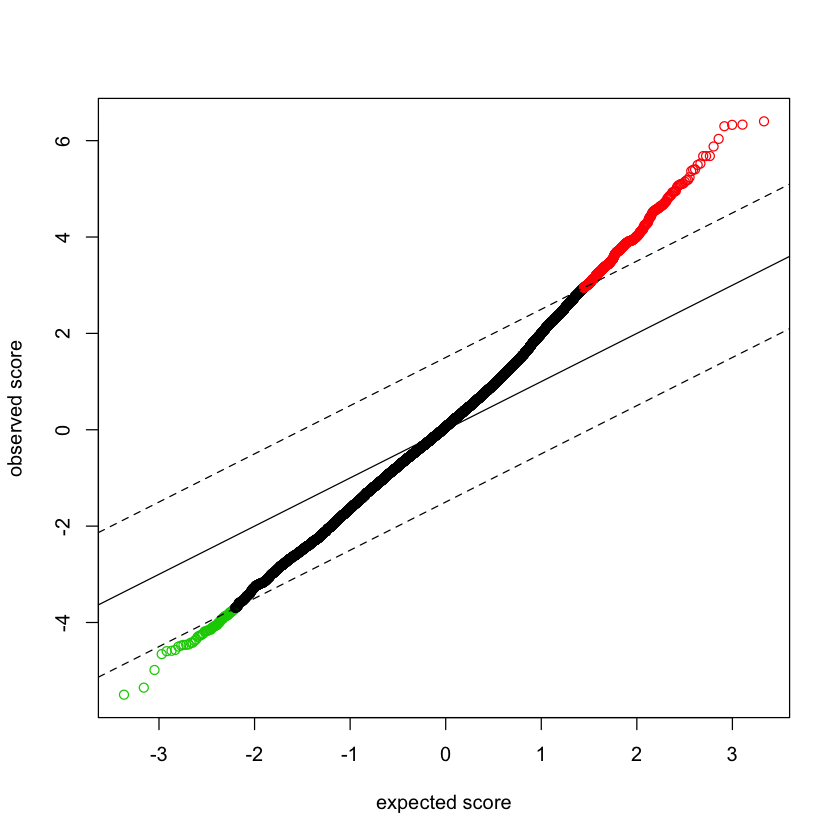

In [282]:
# SAM Plot
samr.plot(samr.obj, delta)

# Red = upregulated genes
# Green = downregulated genes

In [283]:
# Summarize significant genes
siggenes.table <- samr.compute.siggenes.table(samr.obj, delta, data, delta.table, min.foldchange = 1.5)  

# What data we have in the summary list
names(siggenes.table)  

# Number of upregulated genes
nrow(siggenes.table$genes.up)  

# Number of downregulated
nrow(siggenes.table$genes.lo) 


[1] "genes.up"            "genes.lo"            "color.ind.for.multi"
[4] "ngenes.up"           "ngenes.lo"

[1] 388

[1] 39

In [284]:
# Extract upregulated and downregulated gene IDs
up.ids <- siggenes.table$genes.up[, "Gene ID"]  
dn.ids <- siggenes.table$genes.lo[, "Gene ID"]  


In [285]:

#get gene names
print("Down-regulated Genes:")
print(as.character(cleaned_dnkn[which(cleaned_dnkn$ProbID %in% dn.ids),"Gene Symbol"]))

print("Upr-egulated Genes:")
print(as.character(cleaned_dnkn[which(cleaned_dnkn$ProbID %in% up.ids),"Gene Symbol"]))

[1] "Down-regulated Genes:"
 [1] "C5orf13"   "EFNB2"     "ZNF124"    "CRISP3"    "TTC3"      "GPM6B"    
 [7] "SPON1"     "SPON1"     "ATXN7"     "ZMYM2"     "TCF3"      "KDM3B"    
[13] "SNRNP40"   "TRPS1"     "TPPP3"     "CCNJ"      "C14orf101" "ZNF587"   
[19] "HELLS"     "KCTD15"    "KCTD15"    "HEY2"      "ENPP3"     "PSAT1"    
[25] "RCC2"      "CCBL2"     "STK33"     "C2orf88"   "AGR3"      "SHROOM3"  
[31] "SLC25A37"  "EML4"      "NHS"       "ZNF711"    "C9orf24"   "SUDS3"    
[37] "CDC14B"    "MDM4"      "FUS"      
[1] "Upr-egulated Genes:"
  [1] "STAT1"                                  
  [2] "STAT1"                                  
  [3] "STAT1"                                  
  [4] "STAT1"                                  
  [5] "TIMP3"                                  
  [6] "TIMP3"                                  
  [7] "TIMP3"                                  
  [8] "TIMP3"                                  
  [9] "CREG1"                                  
 [10] "UCHL

In [286]:
# Save SAM's DE genes in a matrix

sam.ids <- append((up.ids),(dn.ids))
length(sam.ids)
sam.DE.mat <- dnkn.mat[sam.ids,]
sam.DE.mat[15:17,]

[1] 427

,IUP_1-1,IUP_1-2,IUP_1-3,IUP_1-4,IUP_1-6,IUP_2-1,IUP_2-2,IUP_2-3,IUP_2-6,IUP_2-7,⋯,EP_3-10,EP_3-11,EP_3-3,EP_3-6,EP_3-7,EP_3-4,EP_3-5,EP_3-9,EP_3-12,EP_3-13
206475_x_at,1.16907690,-0.3781216,0.9333382,1.6422992,0.4513388,1.06319710,0.8957639,1.19258310,0.5866623,1.9371676,⋯,-0.2632120,0.02114201,-0.39264417,-0.2297611,-0.3817773,-0.3451951,-0.5979800,-0.6084869,-0.44141770,-0.02114201
207980_s_at,0.07943058,1.6496572,1.0438461,1.8174772,0.8586645,1.57178210,0.8862248,0.76536370,1.3091660,1.2533922,⋯,-0.6294174,-1.40955260,0.42730522,-0.4794731,-0.8661561,-2.8485641,-2.0986610,-3.7720866,-4.03148900,-3.64603570
211656_x_at,-0.07080269,0.2919169,0.8455791,0.2205563,0.9594450,-0.01218033,0.4270668,0.08133984,0.3460836,0.8458681,⋯,-0.3566141,-0.39586306,-0.02229404,-0.4351215,-0.3520641,-0.7182193,-0.3805571,-1.5036473,0.01218033,-0.97502090


--------------
## Task 3: Generating Heatmaps

Before generating heatmaps, we need to install RColorBrewer. It is an R packages that uses the work from http://colorbrewer2.org/ to help choose sensible color schemes for heatmaps and figures in R [4]

In [288]:
# Install and load R Color Brewer

# install.packages("RColorBrewer")
library("RColorBrewer")


Modify the distance function to use correlation instead of Euclidean as distance measure [5].

In [292]:
# modify the distance function to use correlation (based on Yeung et al. [5])

newdist <- function (x) {as.dist (1-cor(t(x)))/2}


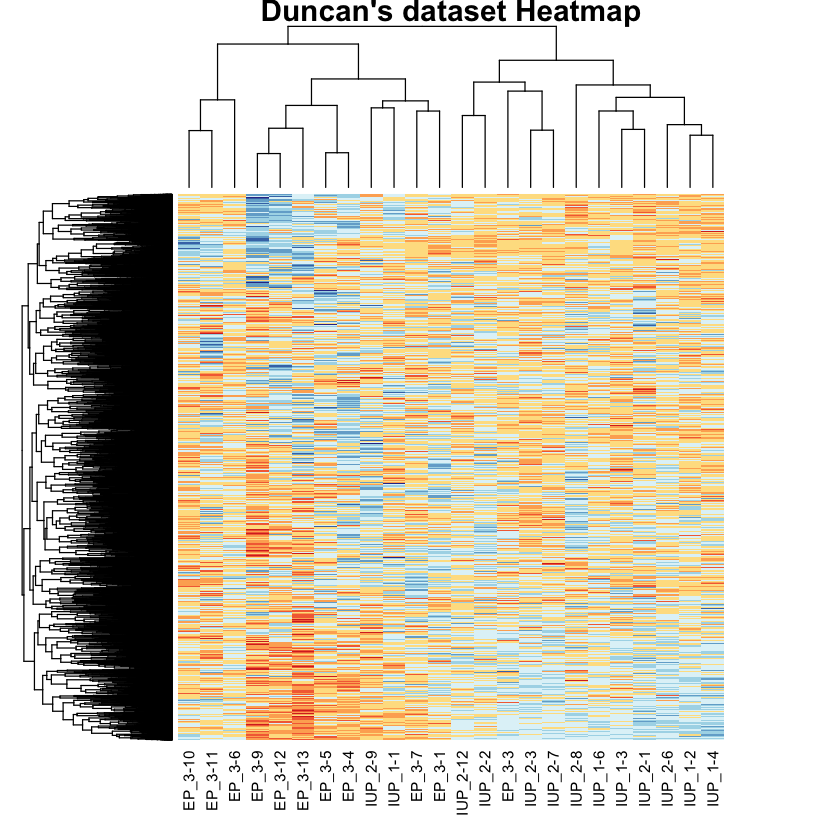

In [298]:
#Duncan's data set heatmap
heatmap(as.matrix(dnkn.mat), distfun=newdist,labRow = FALSE, col=brewer.pal(10,"RdYlBu"), main = "Duncan's dataset Heatmap")

It is noted in this heatmap that IUP and EP are being culstered separatley, only two IUP samples are getting clustered with EP samples (IUP_1-1 & IUP_2-9) and one EP sample EP_3-3 is being grouped with IUP samples ** !!! Check PAPER !!! **

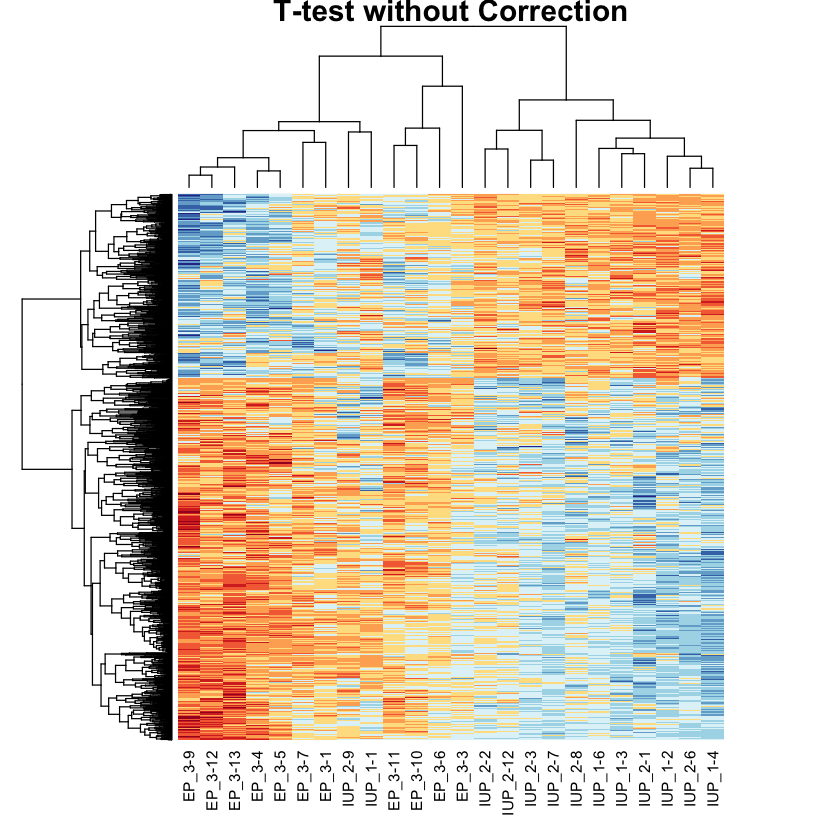

In [299]:
# Heatmap for DE genes resulted from T-test with no correction 
heatmap (as.matrix(ttest.DE.mat), distfun=newdist, labRow = FALSE, , col=brewer.pal(10,"RdYlBu"), main= "T-test without Correction")

Note: IUP_2-9 & IUP_1-1 are still being clustered with EP samples. EP_3-3 is no longer clustered with IUP samples, but still close to IUP expression levels

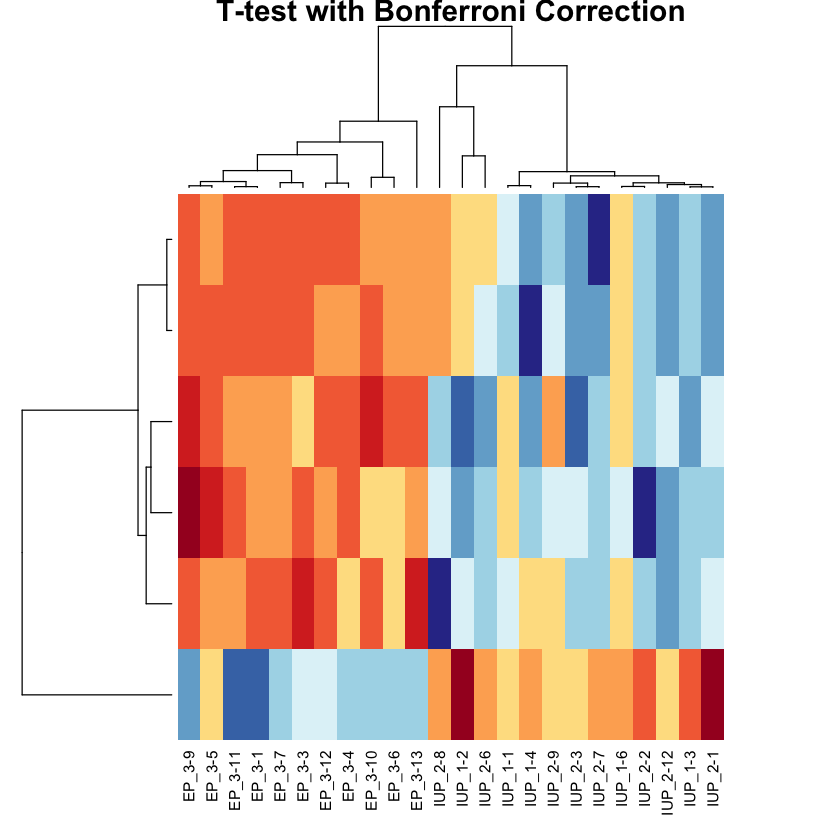

In [300]:
# Heatmap for DE genes resulted from T-test with Bonferroni correction 
heatmap (as.matrix(bonfr.DE.mat), distfun=newdist, labRow = FALSE, , col=brewer.pal(10,"RdYlBu"), main= "T-test with Bonferroni Correction")

In this heatmap, IUP and EP are being grouped into completely separate clusters

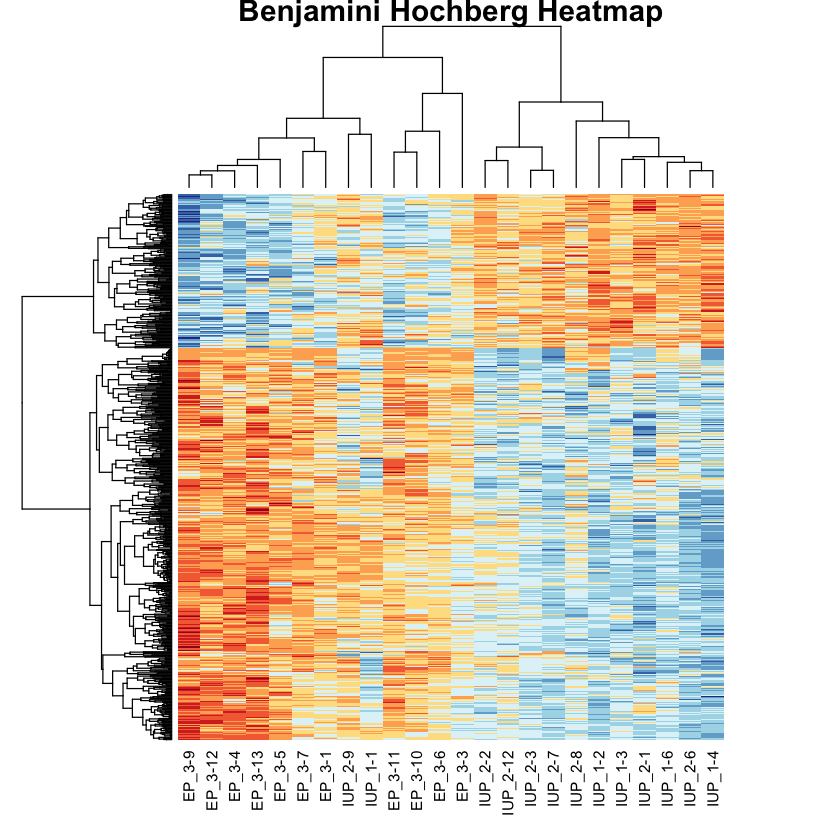

In [312]:
# Heatmap for DE genes resulted from Benjamini Hochberg (FDR)
heatmap (as.matrix(fdr.DE.mat), distfun=newdist, labRow = FALSE, , col=brewer.pal(10,"RdYlBu"), main="Benjamini Hochberg Heatmap")

IUP_2-9 & IUP_1-1 are still being clustered with EP samples with same order as in T-test w/o correction

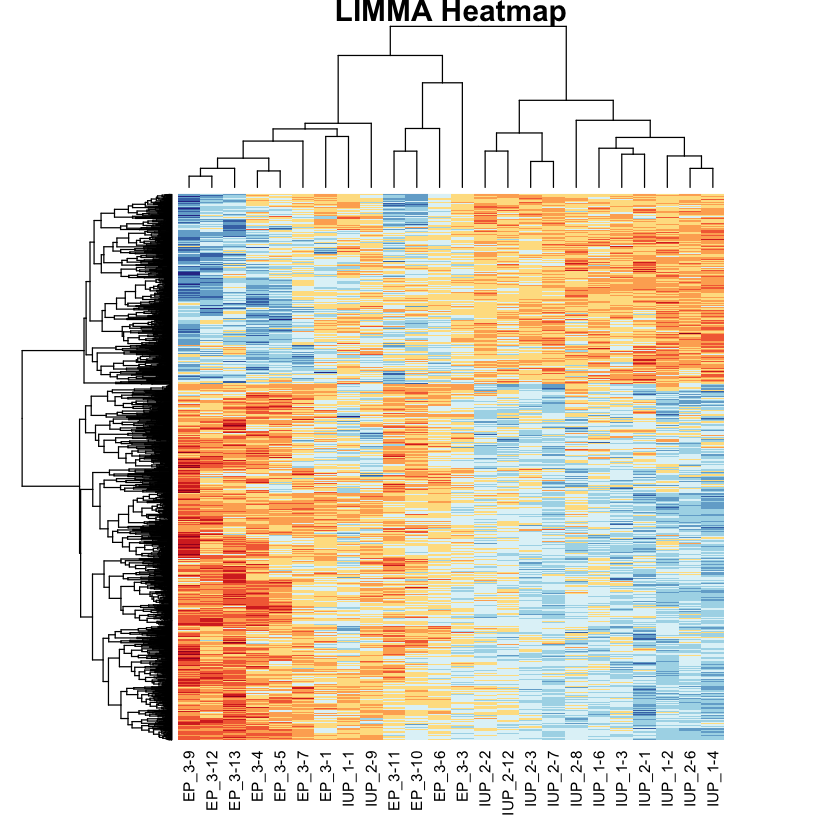

In [314]:
# Heatmap for DE genes resulted from LIMMA
heatmap (as.matrix(limma.DE.mat), distfun=newdist, labRow = FALSE, , col=brewer.pal(10,"RdYlBu"), main="LIMMA Heatmap")

IUP_2-9 & IUP_1-1 are still being clustered with EP samples, but with different order than T-test and Benjamini-Hochberg results

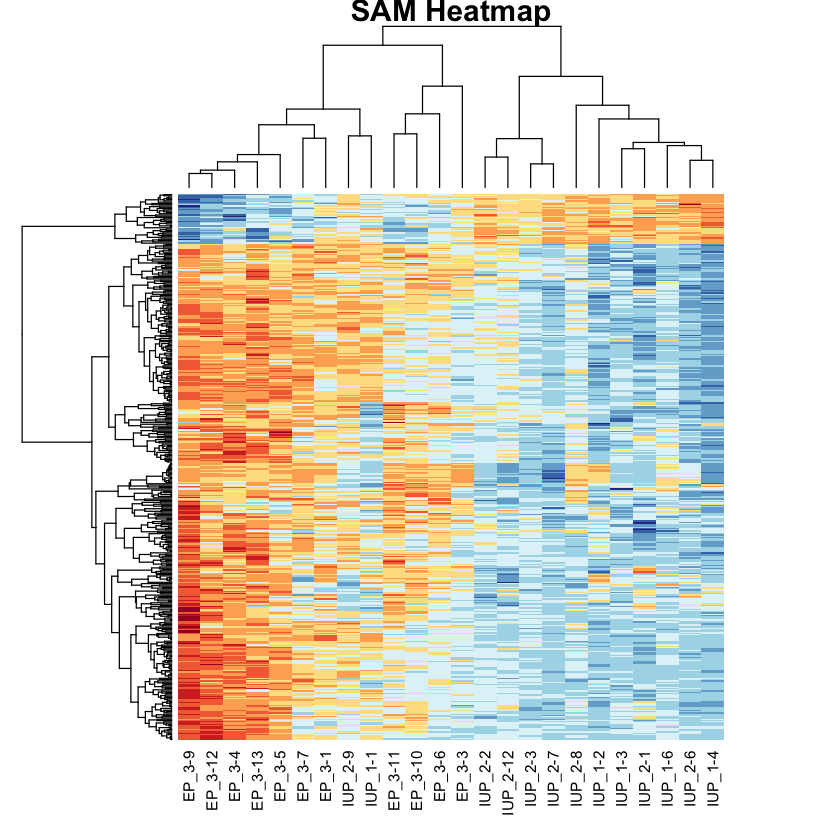

In [316]:
# Heatmap for DE genes resulted from SAM
heatmap (as.matrix(sam.DE.mat), distfun=newdist, labRow = FALSE, , col=brewer.pal(10,"RdYlBu"), main="SAM Heatmap")

IUP_2-9 & IUP_1-1 are still being clustered with EP samples, with the same order in T-test and Benjamini-Hochberg results

-------------

## Task 4: Gene Set Enrichment Analysis -  ***!!  incomplete !! ***

Gene Sets:

*	h: hallmark gene sets https://nbviewer.jupyter.org/github/ReemUW/GSEA_Results/blob/master/my_analysis.Gsea.1489381253605/index.html
*	c1: all positional gene sets
*	c2: all curated gene sets
*	c2: chemical and genetic perturbations
*	c2: all canonical pathways
*	c2: BioCarta gene sets
*	c2: KEGG gene sets
*	c2: Reactome gene sets
*	c3: all motif gene sets
*	c3: microRNA targets
*	c3: transcription factor targets
*	c4: all computational gene sets
*	c4: cancer gene neighborhoods
*	c4: cancer modules
*	c5: all gene ontology (GO) gene sets
*	c5: GO biological processes
*	c5: GO cellular components
*	c5: GO molecular functions
*	c6: oncogenic signatures gene sets


## References:
1. Jeffrey D. Allen, Siling Wang, Min Chen, Luc Girard, John D. Minna, Yang Xie, Guanghua Xiao; Probe mapping across multiple microarray platforms. Brief Bioinform 2012; 13 (5): 547-554. doi: 10.1093/bib/bbr076
3. https://mdozmorov.github.io/BIOS567/assets/presentation_diffexpression/DiffExpr_SAM.html
4. Neuwirth, Erich. "RColorBrewer: ColorBrewer palettes. R package version 1.0-5." (2011).
5. Yeung, Ka Yee, Mario Medvedovic, and Roger E. Bumgarner. "Clustering gene-expression data with repeated measurements." Genome biology 4.5 (2003): R34.
6. Hervé Pagès, Marc Carlson, Seth Falcon and Nianhua Li (2017).
  AnnotationDbi: Annotation Database Interface. R package version
  1.36.2.
7. Hadley Wickham (2017). stringr: Simple, Consistent Wrappers for
  Common String Operations. R package version 1.2.0.
  https://CRAN.R-project.org/package=stringr
8. Marc Carlson (2016). hgu133plus2.db: Affymetrix Human Genome U133
  Plus 2.0 Array annotation data (chip hgu133plus2). R package version
  3.2.3.
9. James W. MacDonald (2016). hugene20stprobeset.db: Affymetrix hugene20
  annotation data (chip hugene20stprobeset). R package version 8.5.0.

